# Multiple Linear Regression

#### Import important libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load dataset

In [3]:
df = pd.read_csv('economic_index.csv')
df.drop(['Unnamed: 0','year','month'], axis = 1, inplace = True)
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [4]:
df.shape

(24, 3)

In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

#### Data analysis

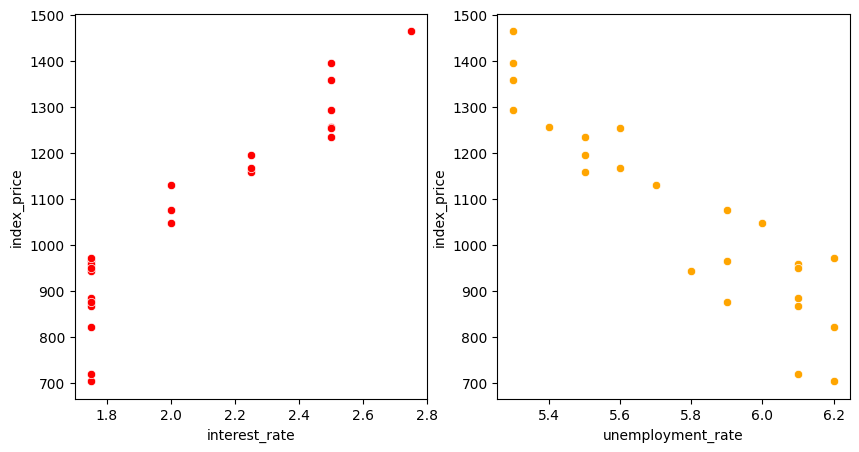

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df['interest_rate'], y=df['index_price'], color = 'red')

plt.subplot(1,2,2)
sns.scatterplot(x=df['unemployment_rate'], y=df['index_price'], color = 'orange')

plt.show()

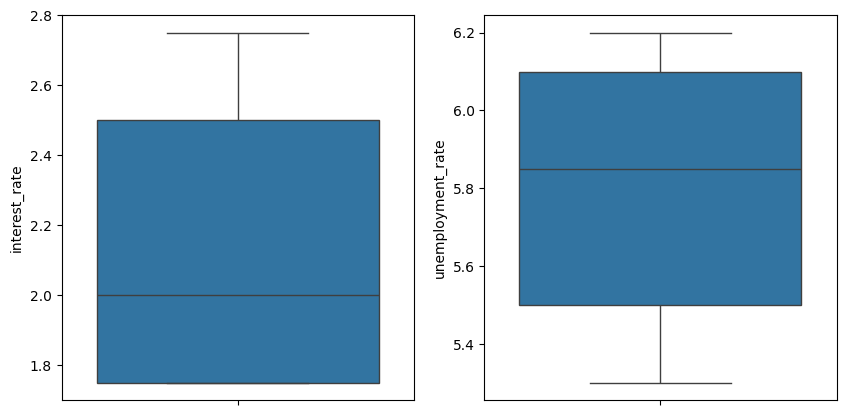

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(df['interest_rate'])

plt.subplot(1,2,2)
sns.boxplot(df['unemployment_rate'])

plt.show()

#### Train-test split

In [8]:
x = df[['interest_rate','unemployment_rate']]
y = df[['index_price']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

#### Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
import pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

# Multiple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [13]:
print(model.coef_)
print(model.intercept_)

[[  86.63351334 -114.04857249]]
[1059.42105263]


In [14]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model, file)

#### Cross-validation

In [15]:
from sklearn.model_selection import cross_val_score
crossval_score = cross_val_score(model, x_train,y_train, cv = 3)
print(cross_val_score)

<function cross_val_score at 0x000001DE8ED304A0>


#### Performance Matrics

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(r2)

6957.105303258833
71.71878409976625
83.40926389351985
0.8254940547158576


In [17]:
N = x_test.shape[0]
p = x_test.shape[1]
adj_r2 = ((1-r2)*(N-1))/(N-p-1)
print(adj_r2)

0.34901189056828485


#### Prediction with new data

In [18]:
year = 2029
month = 'January'
interest_rate = 2.75
unemployment_rate = 5.3

new_df = pd.DataFrame({'year' : [year],
                       'month' : [month],
                       'interest_rate':[interest_rate],
                       'unemployment_rate':[unemployment_rate]})
new_df

,year,month,interest_rate,unemployment_rate
0,2029,January,2.75,5.3


In [19]:
new_df.drop(['year','month'], axis = 1, inplace = True)
new_df = scaler.transform(new_df)
new_df_pred = model.predict(new_df) # 1464
print(new_df_pred[0][0])

1406.385346843336
